In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
xls = pd.ExcelFile('Customer_Churn_Data_Large.xlsx')
df_dict = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}
#print(df_dict)
for sheet_name, df in df_dict.items():
    globals()[sheet_name] = df

In [15]:
Customer_Demographics.head()
Online_Activity.head()
Transaction_History.head()
Customer_Service.head()
Churn_Status.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [16]:
df3 = pd.merge(Customer_Demographics,Churn_Status, on='CustomerID', how='left')
df3.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus
0,1,62,M,Single,Low,0
1,2,65,M,Married,Low,1
2,3,18,M,Single,Low,0
3,4,21,M,Widowed,Low,0
4,5,21,M,Divorced,Medium,0


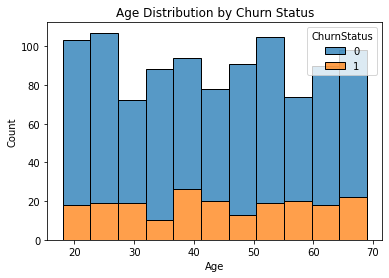

In [17]:
# Age distribution by churn
sns.histplot(data=df3, x='Age', hue='ChurnStatus', multiple='stack')
plt.title("Age Distribution by Churn Status")
plt.show()

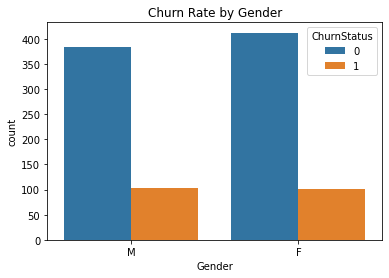

In [18]:
sns.countplot(data=df3, x='Gender', hue='ChurnStatus')
plt.title("Churn Rate by Gender")
plt.show()

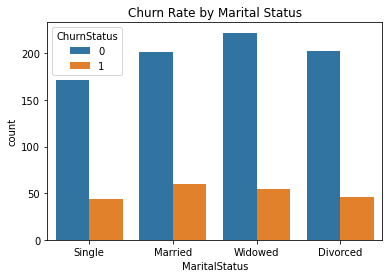

In [19]:
sns.countplot(data=df3, x='MaritalStatus', hue='ChurnStatus')
plt.title("Churn Rate by Marital Status")
plt.show()

In [21]:
##Total spend and transaction count
Trans_agg = Transaction_History.groupby('CustomerID').agg(
TotalSpend =('AmountSpent','sum'),
TransactionCount = ('TransactionID','count')
).reset_index()
Trans_agg.head()

,CustomerID,TotalSpend,TransactionCount
0,1,416.50,1
1,2,1547.42,7
2,3,1702.98,6
3,4,917.29,5
4,5,2001.49,8


In [22]:
product_spend = Transaction_History.pivot_table(
index = 'CustomerID',
columns = 'ProductCategory',
values = 'AmountSpent',
aggfunc = 'sum',
fill_value =0
).reset_index()
product_spend.head()

ProductCategory,CustomerID,Books,Clothing,Electronics,Furniture,Groceries
0,1,0.00,0.00,416.50,0.00,0.00
1,2,0.00,452.33,794.05,101.31,199.73
2,3,241.06,51.07,0.00,823.27,587.58
3,4,0.00,44.22,367.09,382.39,123.59
4,5,0.00,0.00,683.54,398.89,919.06


In [23]:
service_agg = Customer_Service.groupby('CustomerID').agg(
TotalInteractions = ('InteractionID', 'count'),
UnresolvedInteractions = ('ResolutionStatus', lambda x: (x =='Unresolved').sum())
).reset_index()
## You are reseting indexing because you have to do that or else customer id will be con
### If not reset there will not be 0 1 2 3 coming in left handmost lane
service_agg.head()

,CustomerID,TotalInteractions,UnresolvedInteractions
0,1,1,0
1,2,1,0
2,3,1,0
3,4,2,1
4,6,1,0


In [24]:
merged = Customer_Demographics \
.merge(Trans_agg, on='CustomerID', how='left') \
.merge(product_spend, on='CustomerID', how='left') \
.merge(service_agg, on='CustomerID', how='left') \
.merge(Online_Activity, on='CustomerID', how='left') \
.merge(Churn_Status, on='CustomerID', how='left')
merged.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TotalSpend,TransactionCount,Books,Clothing,Electronics,Furniture,Groceries,TotalInteractions,UnresolvedInteractions,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,416.50,1,0.00,0.00,416.50,0.00,0.00,1.0,0.0,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,1547.42,7,0.00,452.33,794.05,101.31,199.73,1.0,0.0,2023-12-05,5,Website,1
2,3,18,M,Single,Low,1702.98,6,241.06,51.07,0.00,823.27,587.58,1.0,0.0,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,917.29,5,0.00,44.22,367.09,382.39,123.59,2.0,1.0,2023-08-25,2,Website,0
4,5,21,M,Divorced,Medium,2001.49,8,0.00,0.00,683.54,398.89,919.06,NaN,NaN,2023-10-27,41,Website,0


In [25]:
num_cols = ['TotalSpend', 'TransactionCount', 'TotalInteractions', 'UnresolvedInteractions','LoginFrequency']
merged[num_cols] = merged[num_cols].fillna(0)
merged = merged.reset_index(drop=True)
merged['CustomerID'] = merged['CustomerID'].astype(str)
merged.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TotalSpend,TransactionCount,Books,Clothing,Electronics,Furniture,Groceries,TotalInteractions,UnresolvedInteractions,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,416.50,1,0.00,0.00,416.50,0.00,0.00,1.0,0.0,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,1547.42,7,0.00,452.33,794.05,101.31,199.73,1.0,0.0,2023-12-05,5,Website,1
2,3,18,M,Single,Low,1702.98,6,241.06,51.07,0.00,823.27,587.58,1.0,0.0,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,917.29,5,0.00,44.22,367.09,382.39,123.59,2.0,1.0,2023-08-25,2,Website,0
4,5,21,M,Divorced,Medium,2001.49,8,0.00,0.00,683.54,398.89,919.06,0.0,0.0,2023-10-27,41,Website,0


In [26]:
print("Merged data shape:", merged.shape)
merged.head()

Merged data shape: (1000, 18)


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TotalSpend,TransactionCount,Books,Clothing,Electronics,Furniture,Groceries,TotalInteractions,UnresolvedInteractions,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,416.50,1,0.00,0.00,416.50,0.00,0.00,1.0,0.0,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,1547.42,7,0.00,452.33,794.05,101.31,199.73,1.0,0.0,2023-12-05,5,Website,1
2,3,18,M,Single,Low,1702.98,6,241.06,51.07,0.00,823.27,587.58,1.0,0.0,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,917.29,5,0.00,44.22,367.09,382.39,123.59,2.0,1.0,2023-08-25,2,Website,0
4,5,21,M,Divorced,Medium,2001.49,8,0.00,0.00,683.54,398.89,919.06,0.0,0.0,2023-10-27,41,Website,0


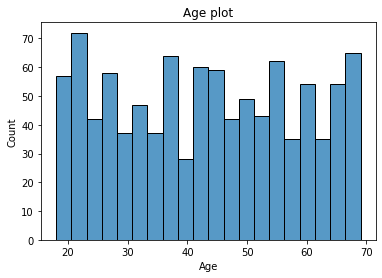

In [27]:
sns.histplot(merged['Age'], bins=20)
plt.title("Age plot")
plt.show()

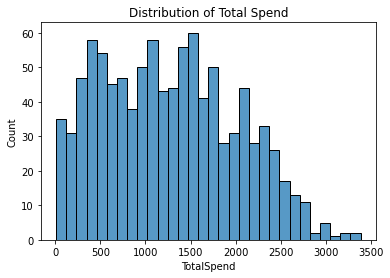

In [28]:
sns.histplot(data=merged, x='TotalSpend', bins=30)
plt.title("Distribution of Total Spend")
plt.show()

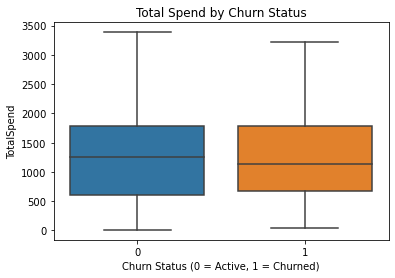

In [29]:
sns.boxplot(x='ChurnStatus', y='TotalSpend', data=merged)
plt.title("Total Spend by Churn Status")
plt.xlabel("Churn Status (0 = Active, 1 = Churned)")
plt.show()

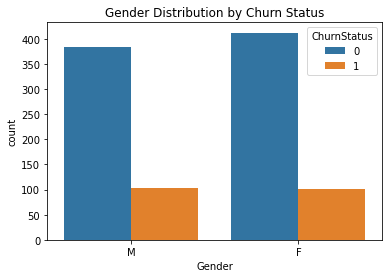

In [30]:
sns.countplot(data=merged, x='Gender', hue='ChurnStatus')
plt.title("Gender Distribution by Churn Status")
plt.show()

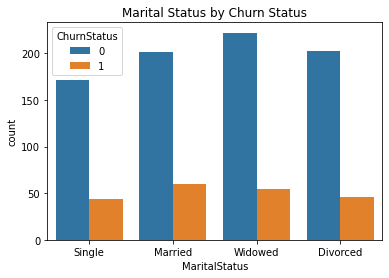

In [31]:
sns.countplot(data=merged, x='MaritalStatus', hue='ChurnStatus')
plt.title("Marital Status by Churn Status")
plt.show()

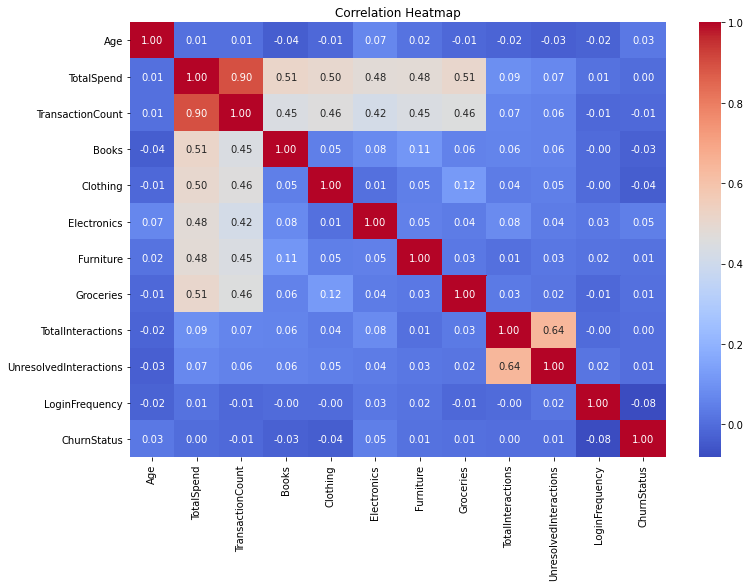

In [32]:
corr_cols = merged.select_dtypes(include=['float64', 'int64']).columns
corr = merged[corr_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
merged.to_csv("cleaned_customer_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_customer_data.csv'.")